In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as m
from ansys.mapdl.core import launch_mapdl, launcher, Mapdl
import numpy as np

In [2]:
ip = 'xx.3.127.xxx'
mapdl = Mapdl(ip=ip, port=8800, request_instance=True)


In [3]:
filenames = ['../Deformed_inputs_2mm/deform_step1_dp17.npz',
             '../Deformed_inputs_2mm/deform_step1_dp9.npz',
             '../Deformed_inputs_2mm/deform_step1_dp2.npz',
             '../Deformed_inputs_2mm/deform_step1_dp14.npz',
             '../Deformed_inputs_2mm/deform_step1_dp13.npz',
             '../Deformed_input_2mm_test_sym/input_step2_dp17_sym1.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp9_sym1.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp2_sym1.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp14_sym1.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp13_sym1.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp17_sym2.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp9_sym2.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp2_sym2.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp14_sym2.inp',
             '../Deformed_input_2mm_test_sym/input_step2_dp13_sym2.inp',
             '../Deformed_inputs_2mm_baseline/input_step2_dp17_baseline.inp',
             '../Deformed_inputs_2mm_baseline/input_step2_dp9_baseline.inp',
             '../Deformed_inputs_2mm_baseline/input_step2_dp2_baseline.inp',
             '../Deformed_inputs_2mm_baseline/input_step2_dp14_baseline.inp',
             '../Deformed_inputs_2mm_baseline/input_step2_dp13_baseline.inp',
             './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/input_step2_dp17.inp',
             './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/input_step2_dp9.inp',
             './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/input_step2_dp2.inp',
             './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/input_step2_dp14.inp',
             './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/input_step2_dp13.inp']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


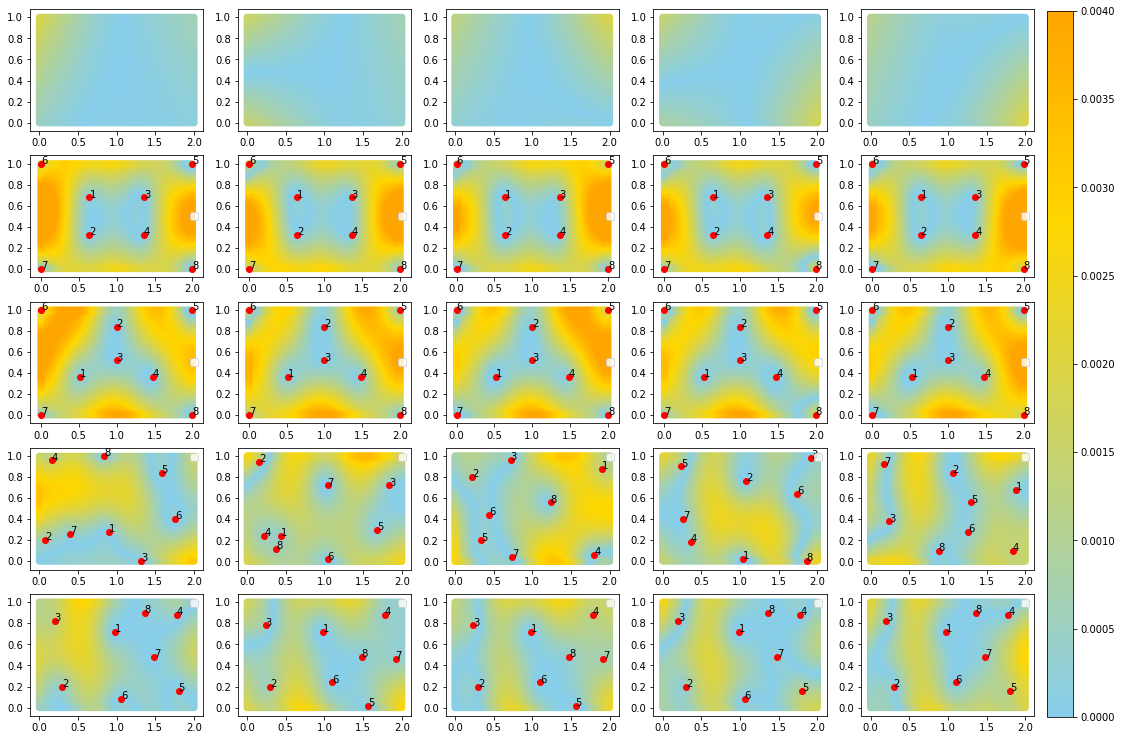

In [4]:
# 17 [4263,44,2595,73,5462,1047,3386,2523]
# 9 [259,2896,1087,3025,5719,4574,607,3326]
# 2 [6043, 2983,409,5956,3247,254,3988,731]
# 14 [4574,630,6111,3319,3046,5769,3086,9059]
# 13 [1112, 4513, 3085, 6026, 4972, 4920, 2901, 4274]
selected_positions = [[368,377,800,809,2552,2553,2578,2628],
                      [304,580,588,880,2552,2553,2578,2628],
                      [4263,44,2595,73,5462,1047,3386,2523],
                      [259,2896,1087,3025,5719,4574,607,3326],
                      [6043,2983,409,5956,3247,254,3988,731],
                      [4574,630,6111,3319,3046,5769,3086,9059],
                      [1112,4513,3085,6026,4972,4920,2901,4274],
                      [4376,3174,2979,5824,1077,4570,877,5090],
                      [4376,3174,3055,5824,5523,4631,6145,877],
                      [4376,3174,3055,5824,5523,4631,6145,877],
                      [4376,3174,2979,5824,1077,4570,877,5090],
                      [4376,3174,2979,5824,1077,4631,877,5090]]
design_point_list = ['dp17', 'dp9', 'dp2', 'dp14', 'dp13']
colors = ["skyblue", "gold","orange"]
nodes = [0.0, 0.7, 1]
cmap1 = m.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
#cmap1 = m.colors.LinearSegmentedColormap.from_list("mycmap", colors)
fig, axes = plt.subplots(5, 5, figsize=(18,13))
# norm = m.colors.Normalize(vmin=0, vmax=0.03)
data_dir = '../Deformed_inputs_2mm/'
test_RL_dir = './PPO_logs/Ansys_assembly/deformed_inputs_nofix_metal/test_input/'
test_sym_dir = '../Deformed_input_2mm_test_sym/'
test_base_dir = '../Deformed_inputs_2mm_baseline/'
input_filename = './PPO_logs/Ansys_assembly/input_step1.inp'
mapdl.input(input_filename)
all_nodes = mapdl.mesh.nodes
bottom_index = np.where(mapdl.mesh.nodes[:,1] == 0)[0]
bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
bottom_displacement_sym1_list = []
bottom_displacement_sym2_list = []
bottom_displacement_baseline_list = []
bottom_displacement_RL_list = []
for i, design_point in enumerate(design_point_list):
    initial_deform_file = data_dir + 'deform_step1_' + design_point + '.npz'
    initial_deform = np.load(initial_deform_file)['data']
    #initial_deform_norm = initial_deform[bottom_index,1]
    initial_deform_norm = np.linalg.norm(initial_deform[bottom_index], axis = 1)
    img = axes[0,i].scatter(bottom_surface_nodes[:,0], bottom_surface_nodes[:,2], 
                          c = initial_deform_norm, cmap = cmap1, vmin=0, vmax=0.004)
    
    input_filename_sym1 = test_sym_dir + 'input_step2_' + design_point + '_sym1.inp'
    mapdl.clear()
    input_filename = input_filename_sym1 
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result
    all_nodes = mapdl.mesh.nodes
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    displacement += initial_deform.copy()
    bottom_displacement = displacement[bottom_index]
    #bottom_displacement_norm = bottom_displacement[:,1]
    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    bottom_displacement_sym1_list.append(bottom_displacement_norm)
    img = axes[1,i].scatter(bottom_surface_nodes[:,0], 
                    bottom_surface_nodes[:,2], 
                    c = bottom_displacement_norm, 
                    cmap = cmap1, vmin=0, vmax=0.004)
    for j in range(len(selected_positions[0])):
        axes[1,i].scatter(all_nodes[selected_positions[0][j]-1,0], 
                        all_nodes[selected_positions[0][j]-1,2], c = 'r')
        axes[1,i].annotate(str(j+1), (all_nodes[selected_positions[0][j]-1,0], 
                                    all_nodes[selected_positions[0][j]-1,2]))
    axes[1,i].legend()
    
    
    input_filename_sym2 = test_sym_dir + 'input_step2_' + design_point + '_sym2.inp'
    mapdl.clear()
    input_filename = input_filename_sym2 
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result 
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    displacement += initial_deform.copy()
    bottom_displacement = displacement[bottom_index]
    #bottom_displacement_norm = bottom_displacement[:,1]
    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    bottom_displacement_sym2_list.append(bottom_displacement_norm)
    img = axes[2,i].scatter(bottom_surface_nodes[:,0], 
                    bottom_surface_nodes[:,2], 
                    c = bottom_displacement_norm, 
                    cmap = cmap1, vmin=0, vmax=0.004)
    for j in range(len(selected_positions[1])):
        axes[2,i].scatter(all_nodes[selected_positions[1][j]-1,0], 
                        all_nodes[selected_positions[1][j]-1,2], c = 'r')
        axes[2,i].annotate(str(j+1), (all_nodes[selected_positions[1][j]-1,0], 
                                    all_nodes[selected_positions[1][j]-1,2]))
    axes[2,i].legend()
    
    
    input_filename_baseline = test_base_dir + 'input_step2_' + design_point + '.inp'
    mapdl.clear()
    input_filename = input_filename_baseline
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result 
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    displacement += initial_deform.copy()
    bottom_displacement = displacement[bottom_index]
    #bottom_displacement_norm = bottom_displacement[:,1]
    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    bottom_displacement_baseline_list.append(bottom_displacement_norm)
    img = axes[3,i].scatter(bottom_surface_nodes[:,0], 
                    bottom_surface_nodes[:,2], 
                    c = bottom_displacement_norm, 
                    cmap = cmap1, vmin=0, vmax=0.004)
    for j in range(len(selected_positions[i+2])):
        axes[3,i].scatter(all_nodes[selected_positions[i+2][j]-1,0], 
                        all_nodes[selected_positions[i+2][j]-1,2], c = 'r')
        axes[3,i].annotate(str(j+1), (all_nodes[selected_positions[i+2][j]-1,0], 
                                    all_nodes[selected_positions[i+2][j]-1,2]))
    axes[3,i].legend()
    
    
    input_filename_RL = test_RL_dir + 'input_step2_' + design_point + '.inp'
    mapdl.clear()
    input_filename = input_filename_RL
    #print(input_filename)
    mapdl.input(input_filename)
    result = mapdl.result 
    bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
    _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
    displacement += initial_deform.copy()
    bottom_displacement = displacement[bottom_index]
    #bottom_displacement_norm = bottom_displacement[:,1]
    bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
    bottom_displacement_RL_list.append(bottom_displacement_norm)
    img = axes[4,i].scatter(bottom_surface_nodes[:,0], 
                    bottom_surface_nodes[:,2], 
                    c = bottom_displacement_norm, 
                    cmap = cmap1, vmin=0, vmax=0.004)
    for j in range(len(selected_positions[i+2])):
        axes[4,i].scatter(all_nodes[selected_positions[i+7][j]-1,0], 
                        all_nodes[selected_positions[i+7][j]-1,2], c = 'r')
        axes[4,i].annotate(str(j+1), (all_nodes[selected_positions[i+7][j]-1,0], 
                                    all_nodes[selected_positions[i+7][j]-1,2]))
    axes[4,i].legend()
    
cb_ax = fig.add_axes([.91,.124,.02,.754])
fig.colorbar(img, cax=cb_ax)

# plt.savefig('./result/deform_viz_new.png')

(array([-0.001,  0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006]),
 <a list of 8 Text yticklabel objects>)

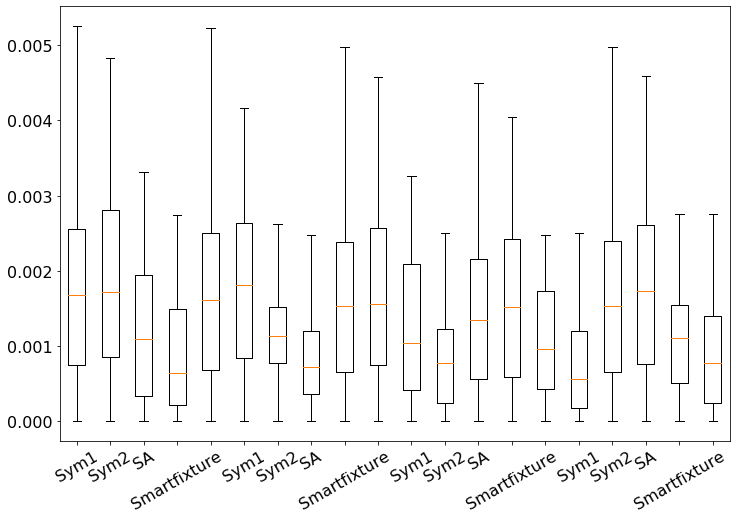

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(12,8))
x_bars = ['Sym1', 'Sym2', 'SA', 'Smartfixture', ' ', 
          'Sym1', 'Sym2', 'SA', 'Smartfixture', ' ',
          'Sym1', 'Sym2', 'SA', 'Smartfixture', ' ',
          'Sym1', 'Sym2', 'SA', 'Smartfixture', ' ',
          'Sym1', 'Sym2', 'SA', 'Smartfixture', ' ']
x_pos_sym1 = [i*4+1 for i in range(5)]
x_pos_sym2 = [i*4+2 for i in range(5)]
x_pos_baseline = [i*4+3 for i in range(5)]
x_pos_RL = [i*4+4 for i in range(5)]
axes.boxplot(bottom_displacement_sym1_list, showfliers=False, positions = x_pos_sym1)
axes.boxplot(bottom_displacement_sym2_list, showfliers=False, positions = x_pos_sym2)
axes.boxplot(bottom_displacement_baseline_list, showfliers=False, positions = x_pos_baseline)
axes.boxplot(bottom_displacement_RL_list, showfliers=False, positions = x_pos_RL)
x_pos = [i+1 for i in range(20)]
plt.xticks(x_pos, x_bars, fontsize = 16, rotation=30)
plt.yticks(fontsize = 16)
# plt.savefig('./result/boxplot_viz_new.png')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

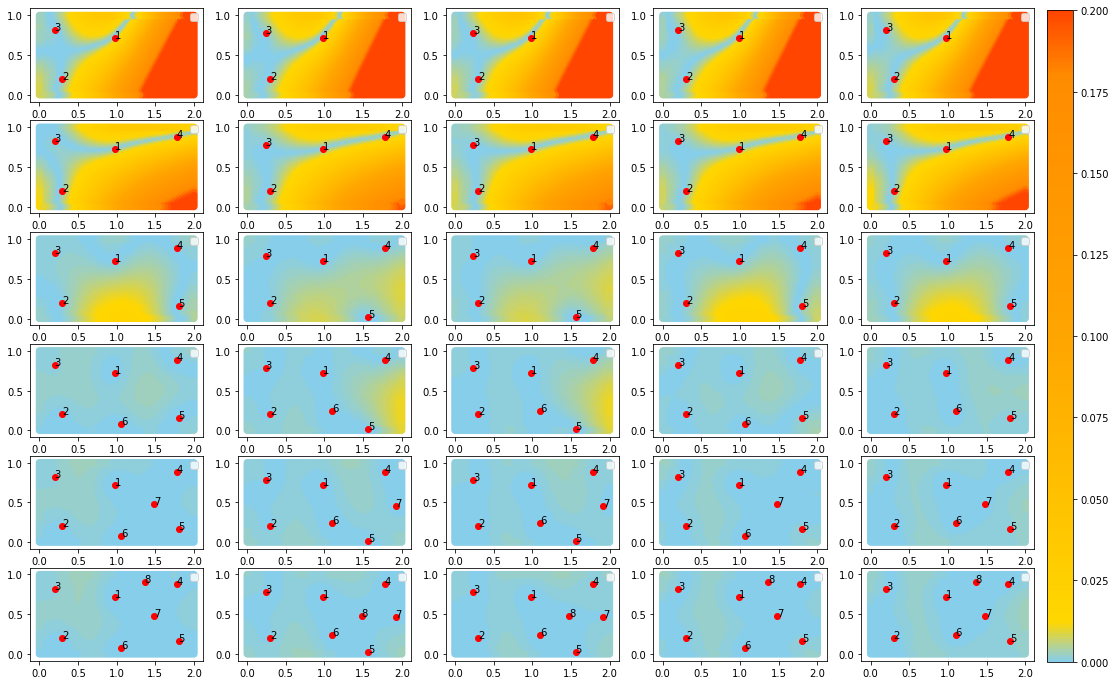

In [7]:
selected_positions = [[4376,3174,2979,5824,1077,4570,877,5090],
                      [4376,3174,3055,5824,5523,4631,6145,877],
                      [4376,3174,3055,5824,5523,4631,6145,877],
                      [4376,3174,2979,5824,1077,4570,877,5090],
                      [4376,3174,2979,5824,1077,4631,877,5090]]
design_point_list = ['dp17', 'dp9', 'dp2', 'dp14', 'dp13']
colors = ["skyblue", "gold","orange","darkorange","orangered"]
nodes = [0.0, 0.06, 0.5, 0.9, 1]
cmap1 = m.colors.LinearSegmentedColormap.from_list("mycmap", list(zip(nodes, colors)))
#cmap1 = m.colors.LinearSegmentedColormap.from_list("mycmap", colors)
fig, axes = plt.subplots(6, 5, figsize=(18,12))
# norm = m.colors.Normalize(vmin=0, vmax=0.03)
data_dir = '../Deformed_inputs_2mm/'
stepwise_RL_dir = './result/'
test_sym_dir = '../Deformed_input_2mm_test_sym/'
input_filename = './PPO_logs/Ansys_assembly/input_step1.inp'
mapdl.input(input_filename)
all_nodes = mapdl.mesh.nodes
bottom_index = np.where(mapdl.mesh.nodes[:,1] == 0)[0]
bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
for i, design_point in enumerate(design_point_list):
    initial_deform_file = data_dir + 'deform_step1_' + design_point + '.npz'
    initial_deform = np.load(initial_deform_file)['data']
    #initial_deform_norm = initial_deform[bottom_index,1]
    initial_deform_norm = np.linalg.norm(initial_deform[bottom_index], axis = 1)
    for k in range(6):
        input_filename_RL = stepwise_RL_dir + design_point + '/' + 'input_step2_' + design_point + '_' + str(k+3) + '.inp'
        #print(input_filename_RL)
        mapdl.clear()
        input_filename = input_filename_RL
        #print(input_filename)
        mapdl.input(input_filename)
        result = mapdl.result 
        bottom_surface_nodes = mapdl.mesh.nodes[bottom_index]
        _, displacement =  result.nodal_displacement(0, in_nodal_coord_sys = True)
        displacement += initial_deform.copy()
        bottom_displacement = displacement[bottom_index]
        #bottom_displacement_norm = bottom_displacement[:,1]
        bottom_displacement_norm = np.linalg.norm(bottom_displacement, axis = 1)
        img = axes[k,i].scatter(bottom_surface_nodes[:,0], 
                        bottom_surface_nodes[:,2], 
                        c = bottom_displacement_norm, 
                        cmap = cmap1, vmin=0, vmax=0.20)
        for j in range(k+3):
            axes[k,i].scatter(all_nodes[selected_positions[i][j]-1,0], 
                            all_nodes[selected_positions[i][j]-1,2], c = 'r')
            axes[k,i].annotate(str(j+1), (all_nodes[selected_positions[i][j]-1,0], 
                                        all_nodes[selected_positions[i][j]-1,2]))
        axes[k,i].legend()
    
        
    
    
cb_ax = fig.add_axes([.91,.124,.02,.754])
fig.colorbar(img, cax=cb_ax)

# plt.savefig('./result/deform_viz_stepwise.png')